# Political Classifier

Text Classification with Keras: Politics vs. Sports

In [194]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
import keras.callbacks as cb
from sklearn.preprocessing import LabelEncoder
import time
from keras import metrics

In [30]:
class LossHistory(cb.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        batch_loss = logs.get('loss')
        self.losses.append(batch_loss)

In [31]:
def plot_losses(losses):
    plt.plot(losses)
    plt.title('Loss per batch')
    plt.show()

In [32]:
#Convert corpus to Data Frame
data = pd.read_csv('train_data_5.csv')

In [33]:
encoder = LabelEncoder()
type_binary = encoder.fit_transform(data.Type)

In [174]:
#keras tokenizer index words in tweets and coverts to matrix
keep_words = 1000
split_words = Tokenizer(num_words= keep_words, lower=True, char_level=False, oov_token=None)
split_words.fit_on_texts(data.Tweet)
dict_matrix = split_words.texts_to_matrix(data.Tweet, mode='count')

# FNN

Given the corpus and problem. A feedforward network should perform well on this data.

In [121]:
def ffn_model():
    model = Sequential()
    model.add(Dense(256, activation='relu', input_shape=(keep_words,), kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dropout(.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(.3))
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(.25))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

Train on 4241 samples, validate on 2284 samples
Epoch 1/8
4241/4241 [==============================] - 4s 865us/step - loss: 2.8835 - acc: 0.5801 - val_loss: 1.4825 - val_acc: 0.7312
Epoch 2/8
4241/4241 [==============================] - 1s 126us/step - loss: 0.9833 - acc: 0.7527 - val_loss: 0.5138 - val_acc: 0.8919
Epoch 3/8
4241/4241 [==============================] - 1s 119us/step - loss: 0.4824 - acc: 0.8838 - val_loss: 0.3731 - val_acc: 0.9076
Epoch 4/8
4241/4241 [==============================] - 1s 126us/step - loss: 0.3702 - acc: 0.9109 - val_loss: 0.3661 - val_acc: 0.9028
Epoch 5/8
4241/4241 [==============================] - 1s 121us/step - loss: 0.3359 - acc: 0.9241 - val_loss: 0.3695 - val_acc: 0.9028
Epoch 6/8
4241/4241 [==============================] - 1s 122us/step - loss: 0.3257 - acc: 0.9288 - val_loss: 0.3799 - val_acc: 0.9002
Epoch 7/8
4241/4241 [==============================] - 1s 122us/step - loss: 0.3060 - acc: 0.9392 - val_loss: 0.3579 - val_acc: 0.9102
Epoch 8

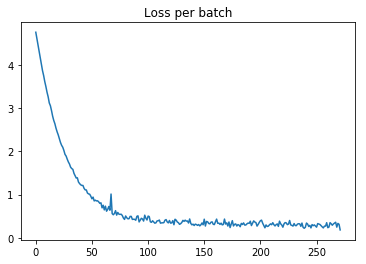

In [122]:
ffn_model1 = ffn_model()
history = LossHistory()
ffn_model1.fit(dict_matrix, type_binary, epochs=8, batch_size=128,
                callbacks=[history],
                validation_split=.35, verbose=1)

plot_losses(history.losses)

As can be seen above, model reaches train accuracy of 94.41% and test accuracy of 91.55%. Given the dataset this result is reasonable. If you consider a one or short worded tweet about politics, it is near impossible to determine what topic this is classified as. Looking at the dataset, every 10 or 20 tweets is short worded, which makes it harder to achieve accuracy more than 92 percent. Investigation of tuning model below.

#### Investigate Impact of architecture, regularization, and hyperparameters

In [146]:
def ffn_model2():
    model = Sequential()
    model.add(Dense(1028, activation='relu', input_shape=(keep_words,)))
    model.add(Dropout(.6))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(.6))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

Train on 4241 samples, validate on 2284 samples
Epoch 1/5
4241/4241 [==============================] - 5s 1ms/step - loss: 0.5059 - acc: 0.7534 - val_loss: 0.2483 - val_acc: 0.8949
Epoch 2/5
4241/4241 [==============================] - 2s 369us/step - loss: 0.2037 - acc: 0.9073 - val_loss: 0.1797 - val_acc: 0.9098
Epoch 3/5
4241/4241 [==============================] - 2s 367us/step - loss: 0.1343 - acc: 0.9392 - val_loss: 0.1707 - val_acc: 0.9199
Epoch 4/5
4241/4241 [==============================] - 2s 371us/step - loss: 0.0970 - acc: 0.9564 - val_loss: 0.1843 - val_acc: 0.9177
Epoch 5/5
4241/4241 [==============================] - 2s 370us/step - loss: 0.0700 - acc: 0.9729 - val_loss: 0.1990 - val_acc: 0.9137


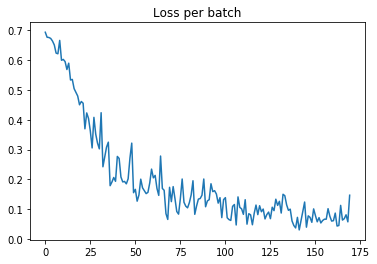

In [147]:
ffn_model2 = ffn_model2()
history = LossHistory()
ffn_model2.fit(dict_matrix, type_binary, epochs=5, batch_size=128,
                callbacks=[history],
                validation_split=.35, verbose=1)

plot_losses(history.losses)

A wider, but shallow models results can be seen above. This model was able to learn effectively similar to the previous one. It reached the maximum expected results. Dropout was used in this implementation and was made much larger because of the size of the network.

In [151]:
def ffn_model3():
    model = Sequential()
    model.add(Dense(256, activation='relu', input_shape=(keep_words,)))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

Train on 4241 samples, validate on 2284 samples
Epoch 1/5
4241/4241 [==============================] - 4s 928us/step - loss: 0.4961 - acc: 0.7637 - val_loss: 0.2391 - val_acc: 0.8958
Epoch 2/5
4241/4241 [==============================] - 0s 94us/step - loss: 0.1771 - acc: 0.9203 - val_loss: 0.1782 - val_acc: 0.9208
Epoch 3/5
4241/4241 [==============================] - 0s 94us/step - loss: 0.0885 - acc: 0.9625 - val_loss: 0.1977 - val_acc: 0.9094
Epoch 4/5
4241/4241 [==============================] - 0s 94us/step - loss: 0.0518 - acc: 0.9783 - val_loss: 0.2237 - val_acc: 0.9076
Epoch 5/5
4241/4241 [==============================] - 0s 99us/step - loss: 0.0344 - acc: 0.9863 - val_loss: 0.2375 - val_acc: 0.9081


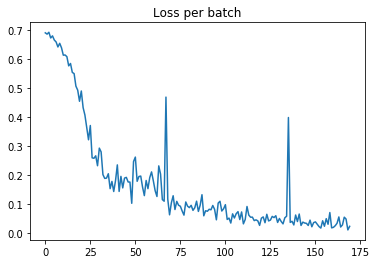

In [152]:
ffn_model3 = ffn_model3()
history = LossHistory()
ffn_model3.fit(dict_matrix, type_binary, epochs=5, batch_size=128,
                callbacks=[history],
                validation_split=.35, verbose=1)

plot_losses(history.losses)

This model does not include regularization, as can be seen with the train loss. The function overfits to the training data getting an accuracy of 98.63%. What happens in this scenario is that a word that is not political will be learned as political despite it not having any relevance. This is bad for the function of this algorithm, to detect political content.

In [160]:
def ffn_model4():
    model = Sequential()
    model.add(Dense(256, activation='relu', input_shape=(keep_words,), kernel_regularizer=regularizers.l2(0.03)))
    model.add(Dropout(.8))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(.8))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(.3))
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(.25))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

Train on 4241 samples, validate on 2284 samples
Epoch 1/20
4241/4241 [==============================] - 5s 1ms/step - loss: 7.1268 - acc: 0.4919 - val_loss: 2.9648 - val_acc: 0.5219
Epoch 2/20
4241/4241 [==============================] - 1s 144us/step - loss: 1.7128 - acc: 0.5202 - val_loss: 0.9774 - val_acc: 0.5919
Epoch 3/20
4241/4241 [==============================] - 1s 136us/step - loss: 0.8208 - acc: 0.5562 - val_loss: 0.7413 - val_acc: 0.6966
Epoch 4/20
4241/4241 [==============================] - 1s 140us/step - loss: 0.7172 - acc: 0.6251 - val_loss: 0.6894 - val_acc: 0.7723
Epoch 5/20
4241/4241 [==============================] - 1s 137us/step - loss: 0.6771 - acc: 0.7201 - val_loss: 0.5908 - val_acc: 0.8323
Epoch 6/20
4241/4241 [==============================] - 1s 143us/step - loss: 0.5875 - acc: 0.8354 - val_loss: 0.4491 - val_acc: 0.8975
Epoch 7/20
4241/4241 [==============================] - 1s 135us/step - loss: 0.5296 - acc: 0.8512 - val_loss: 0.4384 - val_acc: 0.9050
Ep

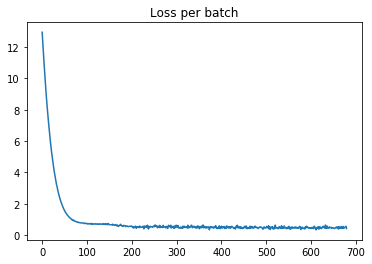

In [161]:
ffn_model4 = ffn_model4()
history = LossHistory()
ffn_model4.fit(dict_matrix, type_binary, epochs=20, batch_size=128,
                callbacks=[history],
                validation_split=.35, verbose=1)

plot_losses(history.losses)

As can be seen above, we have adjusted hyperparameters from the initial model. The results are still acceptable, however many more epochs are required to get a suitable result which means more compute time.

#### Analyze Performance

Calculates Results of Data (Test and Train), Last approximate 2000 examples are train corpus.

** Note: If the content is political, label is 0. If it is about sports label is 1. **

In [187]:
results = ffn_model1.predict(dict_matrix, verbose=1, steps=None)

6525/6525 [==============================] - 1s 94us/step


Tweet 6392

"The Prime Minister has just finished his speech on the EU. Read it here http//t.co/RqYQpvwB EUspeech"

Prediction:

In [188]:
results[6392]

array([ 0.0043353], dtype=float32)

Tweet 6398

"The President We need to modernise our political system. The government will seek to ensure political parties equal access to the media"

Prediction:

In [189]:
results[6398]

array([  7.64250872e-05], dtype=float32)

Tweet 6519

"After the game RossTurnbull has just met a hero of his former Newcastle keeper Pavel Srnicek. Hes over the moon CFC"

Prediction:

In [191]:
results[6519]

array([ 0.99734133], dtype=float32)